In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_csv("data_after_clustering.csv")

In [2]:
df1.head()

,TRUE VALUE,SiO2 (wt. %),TiO2 (wt. %),Al2O3 (wt. %),Cr2O3 (wt. %),FeO (wt. %),MnO (wt. %),MgO (wt. %),CaO (wt. %),Na2O (wt. %),IV (Al),H2O (wt. %),km_clustering_label,ap_clustering_label
0,1,47.604,2.858,5.749,0.062,7.024,0.087,12.625,22.916,0.328,0.207900,0.061750,0,7
1,1,51.788,1.166,2.557,0.475,6.801,0.145,14.762,21.743,0.327,0.080071,0.014881,1,6
2,1,46.561,3.109,6.139,0.145,6.914,0.037,12.478,23.112,0.620,0.238984,0.023204,0,7
3,1,46.344,3.170,7.776,0.014,6.842,0.068,11.688,23.067,0.574,0.258931,0.049703,0,7
4,1,50.180,1.965,3.294,0.106,5.729,0.063,13.603,23.626,0.540,0.121500,0.019333,0,0


In [3]:
# Number of classification types in the data
df1["TRUE VALUE"].value_counts()

 1    1488
-1     467
 0     317
Name: TRUE VALUE, dtype: int64

In [4]:
# data1 is the dataset with the true categorical information removed (contains the result of clustering)
data1 = df1.drop("TRUE VALUE", axis=1)
data1.head()

,SiO2 (wt. %),TiO2 (wt. %),Al2O3 (wt. %),Cr2O3 (wt. %),FeO (wt. %),MnO (wt. %),MgO (wt. %),CaO (wt. %),Na2O (wt. %),IV (Al),H2O (wt. %),km_clustering_label,ap_clustering_label
0,47.604,2.858,5.749,0.062,7.024,0.087,12.625,22.916,0.328,0.207900,0.061750,0,7
1,51.788,1.166,2.557,0.475,6.801,0.145,14.762,21.743,0.327,0.080071,0.014881,1,6
2,46.561,3.109,6.139,0.145,6.914,0.037,12.478,23.112,0.620,0.238984,0.023204,0,7
3,46.344,3.170,7.776,0.014,6.842,0.068,11.688,23.067,0.574,0.258931,0.049703,0,7
4,50.180,1.965,3.294,0.106,5.729,0.063,13.603,23.626,0.540,0.121500,0.019333,0,0


In [5]:
df2 = pd.read_excel("data.xlsx", engine="openpyxl")

In [6]:
df2.head()

,TRUE VALUE,SiO2 (wt. %),TiO2 (wt. %),Al2O3 (wt. %),Cr2O3 (wt. %),FeO (wt. %),MnO (wt. %),MgO (wt. %),CaO (wt. %),Na2O (wt. %),IV (Al),H2O (wt. %)
0,1,47.604,2.858,5.749,0.062,7.024,0.087,12.625,22.916,0.328,0.207900,0.061750
1,1,51.788,1.166,2.557,0.475,6.801,0.145,14.762,21.743,0.327,0.080071,0.014881
2,1,46.561,3.109,6.139,0.145,6.914,0.037,12.478,23.112,0.620,0.238984,0.023204
3,1,46.344,3.170,7.776,0.014,6.842,0.068,11.688,23.067,0.574,0.258931,0.049703
4,1,50.180,1.965,3.294,0.106,5.729,0.063,13.603,23.626,0.540,0.121500,0.019333


In [7]:
# Complete data set with only eigenvalues
data2 = df2.drop("TRUE VALUE", axis=1)
# Complete data set with only true classifieds
labels = df2["TRUE VALUE"]

<AxesSubplot:>

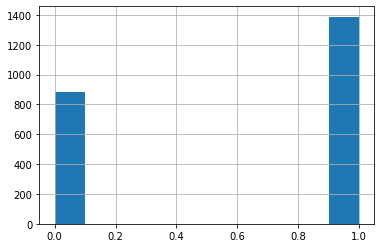

In [8]:
# View the category tag values after clustering using kmeans, two classes
data1['km_clustering_label'].hist()

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

# Stratified sampling based on kmeans clustering results
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data1, data1["km_clustering_label"]):
    strat_train_set = data1.loc[train_index]
    strat_test_set = data1.loc[test_index]

In [10]:
def clustering_result_propotions(data):
    """
    Ratio of the number of different classification labels in the training or test set after stratified sampling
    
    :param data: Training set or test set, purely random or stratified sampling
    """
    return data["km_clustering_label"].value_counts() / len(data)

In [11]:
# Test set acquired by stratified sampling, number of different classification labels ratio
clustering_result_propotions(strat_test_set)

1    0.610989
0    0.389011
Name: km_clustering_label, dtype: float64

In [12]:
# Stratified sampling acquired training set, number of different classification labels ratio
clustering_result_propotions(strat_train_set)

1    0.610897
0    0.389103
Name: km_clustering_label, dtype: float64

In [13]:
# Complete dataset, number of different category labels ratio
clustering_result_propotions(data1)

1    0.610915
0    0.389085
Name: km_clustering_label, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

# purely random sampling
random_train_set, random_test_set = train_test_split(data1, test_size=0.2, random_state=42)

# Full data set, test set after stratified sampling,
# test set after pure random sampling, number of different classification labels ratio
compare_props = pd.DataFrame({
    "Overall": clustering_result_propotions(data1),
    "Stratified": clustering_result_propotions(strat_test_set),
    "Random": clustering_result_propotions(random_test_set),
}).sort_index()

# Calculating the error in the ratio of the number of different categorical labels
# in the test set after stratified sampling and pure random sampling,
# and the ratio of the number of different categorical labels in the complete data set
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Start. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Start. %error
0,0.389085,0.389011,0.382418,-1.713490,-0.018895
1,0.610915,0.610989,0.617582,1.091301,0.012034


In [16]:
from sklearn.metrics import f1_score

def get_classification_marks(model, data, labels, train_index, test_index):
    """
    Get the score of the classification model (binary or multivariate classifier): F1 value
    
    :param data: Data sets containing only eigenvalues
    :param labels: Data sets containing only tagged values
    :param train_index: Indexing of data in the training set obtained by stratified sampling
    :param test_index: Indexing of data in the test set obtained from stratified sampling
    :return: F1 score value
    """
    m = model(random_state=42)
    m.fit(data.loc[train_index], labels.loc[train_index])
    test_labels_predict = m.predict(data.loc[test_index])
    score = f1_score(labels.loc[test_index], test_labels_predict, average="weighted")
    return score

In [18]:
from sklearn.linear_model import SGDClassifier

# Score values after training the classification model with the training set after stratified sampling
start_marks = get_classification_marks(SGDClassifier, data2, labels,
                                       strat_train_set.index, strat_test_set.index)
start_marks

0.6568110775327486

In [19]:
# Score values after training a categorical model with a purely randomly sampled training set
random_marks = get_classification_marks(SGDClassifier, data2, labels, random_train_set.index, random_test_set.index)
random_marks

0.6656144728729727

In [20]:
from sklearn.metrics import f1_score, r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone, BaseEstimator, TransformerMixin

class stratified_cross_val_score(BaseEstimator, TransformerMixin):
    """Implementation of k-fold cross-validation based on stratified sampling"""
    
    def __init__(self, model, random_state=0, cv=5, pattern="classification"):
        """
        :model: Models for training (regression or classification)
        :random_state: Random seed value of the model
        :cv: Number of cross-validations
        :pattern: Both classification and regression options
        """
        self.model = model
        self.random_state = random_state
        self.cv = cv
        self.pattern = pattern
        self.scores_ = []  
        self.best_score_ = []
        self.estimators_ = []
        self.best_estimator_ = []
        
        self.i = 0            
    
    def fit(self, X, y, layer_tag):
        """
        :param X: Complete data set containing only eigenvalues
        :param y: Complete data set containing only tagged values
        :param tag: Complete dataset containing only the basis for the hierarchy (in this case, KMeans clustering results)
        
        """
        skfolds = StratifiedKFold(n_splits=self.cv, random_state=self.random_state)

        for train_index, test_index in skfolds.split(X, layer_tag):
            # Replicate the model to be trained (classification or regression)
            clone_model = clone(self.model)
            strat_X_train_folds, strat_X_test_fold = X.iloc[train_index], X.iloc[test_index]
            strat_y_train_folds, strat_y_test_fold = y.iloc[train_index], y.iloc[test_index]
            
            # training model
            clone_model.fit(strat_X_train_folds, strat_y_train_folds)
            # Retention model
            self.estimators_.append(clone_model)
            # Predicted values (here are the classification results from the classification model)
            test_labels_pred = clone_model.predict(strat_X_test_fold)
            
            if self.pattern == "classification":
                # F1 values for classification models
                score_fold = f1_score(y.iloc[test_index], test_labels_pred, average="weighted")
            elif self.pattern == "regression":
                # The regression model uses r2 values
                score_fold = r2_score(y.iloc[test_index], test_labels_pred)
            
            # Avoid adding values to the list repeatedly
            if self.i < self.cv:
                self.scores_.append(score_fold)
            else:
                None
                
            self.i += 1
        
        # Get an index of the highest rated models
        argmax  = np.argmax(self.scores_)
        self.best_score_ = self.scores_[argmax]
        self.best_estimator_ = self.estimators_[argmax]
        
    def transform(self, X, y=None):
        return self
    
    def mean(self):
        """Return the mean of cross-validation scores"""
        return np.array(self.scores_).mean()
    
    def std(self):
        """Return the standard deviation of the cross-validation score"""
        return np.array(self.scores_).std()

In [21]:
from sklearn.linear_model import SGDClassifier, LinearRegression

# classification model
#clf_model = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
# regression model
clf_model = LinearRegression()
# For cross-validation based on stratified sampling, the default value of the pattern is classification
clf_cross_val = stratified_cross_val_score(clf_model, cv=5, random_state=42, pattern="regression")
# data2 is the complete data set with only eigenvalues, labels is the complete data set with only categorical label values,
# data1 is the complete data set with eigenvalues and clustering results.
clf_cross_val.fit(data2, labels, data1["km_clustering_label"])

/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [22]:
# Score per fold cross validation
clf_cross_val.scores_

[0.26987105798643873,
 0.26073985257088084,
 0.26210674310514226,
 0.2737537146865997,
 -0.06799899887753336]

In [23]:
clf_cross_val.best_score_

0.2737537146865997

In [24]:
# Mean of cross-validation scores
clf_cross_val.mean()

0.1996944738943056

In [25]:
# Standard deviation of cross-validation scores
clf_cross_val.std()

0.13393367692408878

In [26]:
# Five-fold cross-validation of all models
clf_cross_val.estimators_

[LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression()]

In [27]:
# Optimal models in five-fold cross-validation
best_model = clf_cross_val.best_estimator_

LinearRegression()